## Task 1:
### Problem - Develop and evaluate an image classifier using Convolution Neural Network.

### The Data = CIFAR 10 datset.

CIFAR-10 is a dataset of 50,000 32x32 color training images, labeled over 10 categories, and 10,000 test images.
https://www.cs.toronto.edu/~kriz/cifar.html


# CIFAR-10 Multiple Classes
# New section
Example of using Keras for CNNs. Use a famous data set, the CIFAR-10 dataset which consists of 10 different image types.

In [ ]:
#
# Your code to import matplotlib, pandas and numpy libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
#



Following code loads the CIFAR 10 datset.

In [ ]:
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 7s 0us/step


In [ ]:
#
# Your code to print shapes of training and test data. Check how the data looks
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
#

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [ ]:
# Your code to print the shape of one image.
print(x_train[0].shape)

(32, 32, 3)


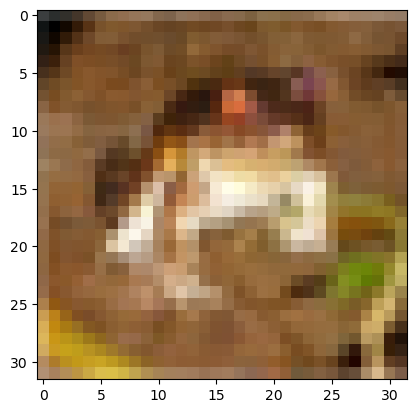

In [ ]:
# Your code to show any sample image in the dataset. Use - plt.imshow()
plt.imshow(x_train[0])

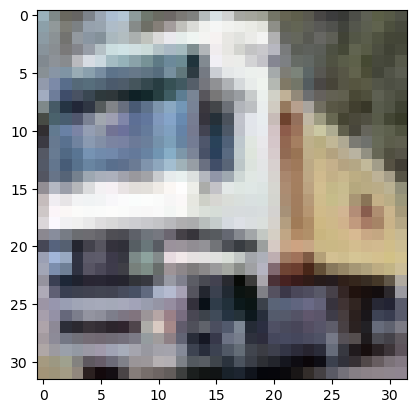

In [ ]:
# Show any other image
plt.imshow(x_train[1])

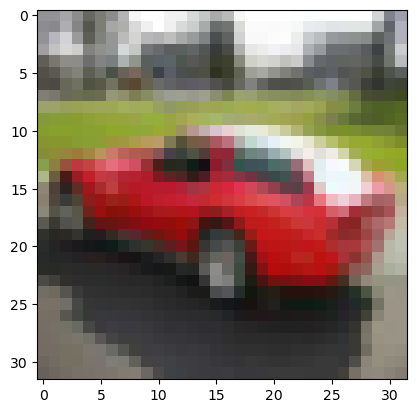

Picture number in the dataBase:  255
Class number:  [1]
Class name:  car


In [ ]:
classes = [ 'aircraft', 'car', 'bird', 'cat', 'deer','dog','frog','horse','ship','truck']
import random
from PIL import Image

n = random.randint(0,x_test.shape[0])

plt.imshow(Image.fromarray(x_train[n]))
plt.show()

print("Picture number in the dataBase: ", n)
print("Class number: ", y_train[n])
print("Class name: ", classes[y_train[n][0]])

# PreProcessing

In [ ]:
# Your code to print one image in digitals. Check how pixels look like.
print(x_train[0])

[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]


In [ ]:
# Your code to print shape of any image i.e particular value in the x_train
x_train[n].shape

(32, 32, 3)

In [ ]:
# Your code to print the maximum value in x_train. Hint - Use .max()
x_train.max()

255

In [ ]:
x_train = x_train/255
x_test = x_test/255

In [ ]:
# Print the shape of x_train again.
x_train.shape

(50000, 32, 32, 3)

In [ ]:
# Print the shape of y_train again.
print(y_train.shape)
print(x_train.shape)

(50000, 1)
(50000, 32, 32, 3)


# One hot vector encoding.
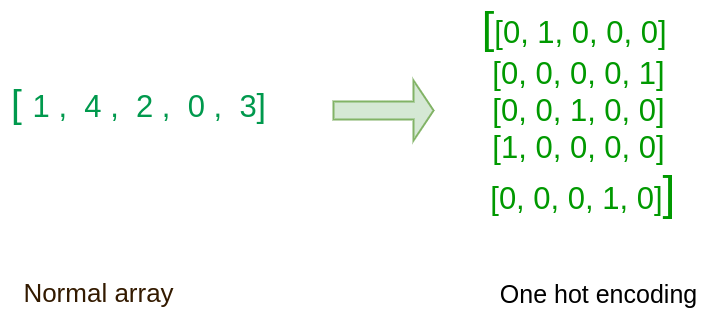


The "to_categorical()" is converting the integer value to binary categorical matrix :: https://keras.io/api/utils/python_utils/#to_categorical-functionLinks to an external site.

In [ ]:
from tensorflow.keras.utils import to_categorical

# Your code to print shape of y_train [0]
y_train[0].shape

# Your code to use to_categorical to convert integers to numbers. Assign the new array to the variable y_cat_train
y_cat_train = to_categorical(y_train,10)

In [ ]:
# Your code to print shape of the array y_cat_train
y_cat_train.shape

(50000, 10)

In [ ]:
# Your code to print any single value in the array y_cat_train and print y_train with the same index.
print(y_cat_train[1])
print(y_train[1])

# Compare the result for better understanding of "to_categorical()"

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[9]


In [ ]:
# Your code to:
# Convert y_test to the encoded vector in same manner/ Assign it to the variable y_cat_test
y_cat_test = to_categorical(y_test, 10)

# Print the shapes to look how y_cat_test looks.
y_test.shape


(10000, 1)

----------
# Building the Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

#### Please read the following links before creating code for the next cell

https://keras.io/api/layers/convolution_layers/convolution2d/
    
https://keras.io/api/layers/pooling_layers/max_pooling2d/

In [ ]:
model = Sequential()


model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))
model.add(MaxPool2D(pool_size=(2, 2)))

#
# Add more convolution and pooling layers with your choice of filters, strides, and activation function
model.add(Conv2D(filters=32, kernel_size=(4,4), activation='relu',))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(filters=32, kernel_size=(4,4), activation='relu',))
model.add(MaxPool2D(pool_size=(2, 2)))
#

model.add(Flatten())

#
# Add few dense layers.
model.add(Dense(500, activation='relu'))
model.add(Dense(250, activation='relu'))
model.add(Dense(180, activation='relu'))
model.add(Dense(90, activation='relu'))
model.add(Dense(10, activation='softmax'))




#




In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 29, 29, 32)        1568      
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 14, 14, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_16 (Conv2D)          (None, 11, 11, 32)        16416     
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 5, 5, 32)          0         
 ng2D)                                                           
                                                                 
 conv2d_17 (Conv2D)          (None, 2, 2, 32)          16416     
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 1, 1, 32)         

### We could use early stopping in Keras to break from the training.
### What this does is for successive iterations it monitors the loss. If the loss does not decreases for a certain number of iterations denoted by variable 'patience' then the training stops.
### Following code shows how you can use early stopping.


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=3)

In [ ]:
# Your code to compile the models (model.compile). Use 'categorical cross entropy' as the loss function
# and use 'accuracy' as the metrics
# Your can use the optimiser of your choice
model.compile(optimizer="Adam", loss="categorical_crossentropy", metrics=["accuracy"])



In [ ]:
# Your code to fit the model (model.fit). Use additional parameter -  callbacks = [early_stop] to eanable early stopping.
# use 'history' array to save the training parameters for each epoch

# print(y_train.shape)
# print(x_train.shape)


history = model.fit(x_train, y_cat_train, validation_data=(x_test,y_cat_test), shuffle = True, verbose=1, epochs = 15, callbacks=[early_stop])


Epoch 1/15
1563/1563 [==============================] - 26s 15ms/step - loss: 1.1349 - accuracy: 0.5952 - val_loss: 1.1590 - val_accuracy: 0.5904
Epoch 2/15
1563/1563 [==============================] - 24s 15ms/step - loss: 1.0851 - accuracy: 0.6150 - val_loss: 1.1575 - val_accuracy: 0.5954
Epoch 3/15
1563/1563 [==============================] - 24s 15ms/step - loss: 1.0444 - accuracy: 0.6315 - val_loss: 1.1097 - val_accuracy: 0.6120
Epoch 4/15
1563/1563 [==============================] - 24s 16ms/step - loss: 1.0110 - accuracy: 0.6433 - val_loss: 1.1386 - val_accuracy: 0.6099
Epoch 5/15
1563/1563 [==============================] - 24s 16ms/step - loss: 0.9798 - accuracy: 0.6540 - val_loss: 1.1119 - val_accuracy: 0.6145
Epoch 6/15
1563/1563 [==============================] - 25s 16ms/step - loss: 0.9595 - accuracy: 0.6618 - val_loss: 1.1051 - val_accuracy: 0.6148
Epoch 7/15
1563/1563 [==============================] - 25s 16ms/step - loss: 0.9293 - accuracy: 0.6722 - val_loss: 1.0313 -

### We can save the model in a file. Following code shows how to do this.

In [ ]:
# Careful, don't overwrite file!
model.save('cifar_10epochs.keras')

### We can save the loss at every step. Following code shows how to do this.

In [ ]:
losses = pd.DataFrame(model.history.history)

In [ ]:
# Print first few rows of losses.
print(losses.head)

<bound method NDFrame.head of        loss  accuracy  val_loss  val_accuracy
0  1.134890   0.59520  1.158975        0.5904
1  1.085095   0.61504  1.157460        0.5954
2  1.044364   0.63154  1.109653        0.6120
3  1.011008   0.64332  1.138554        0.6099
4  0.979845   0.65402  1.111893        0.6145
5  0.959493   0.66182  1.105139        0.6148
6  0.929307   0.67220  1.031347        0.6362
7  0.906126   0.68166  1.071781        0.6328
8  0.884520   0.68794  1.034093        0.6428
9  0.864008   0.69548  1.067672        0.6255>


### Visualise a plot between accuracy vs val_accuracy for all steps.

### x axis will have the steps (epochs)
### y axis will have accuracy and val_accuracy





<Axes: >

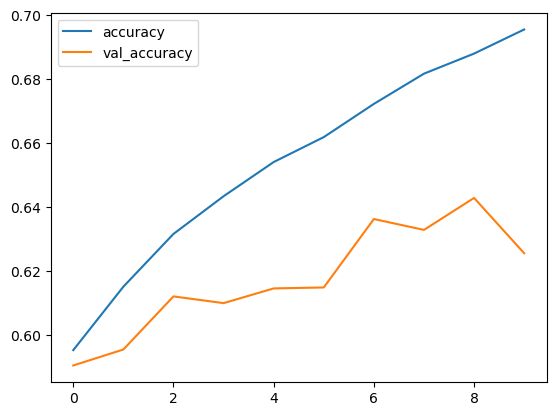

In [ ]:
#
# Your code to plot accuracy and val_accuracy vs the epochs
losses[['accuracy','val_accuracy']].plot()
#

<Axes: >

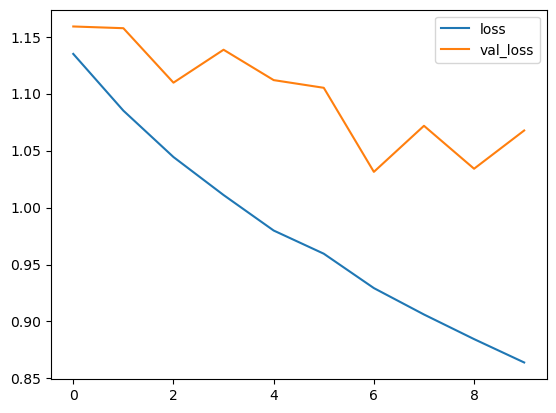

In [ ]:
#
# Your code to plot loss and val_loss vs the epochs
losses[['loss','val_loss']].plot()
#

### You could print the metrics name that model have used.

### Following code shows how to do this.

In [ ]:
model.metrics_names

['loss', 'accuracy']

### Following code shows how to evaluate your model.

In [ ]:
model.evaluate(x_test,y_cat_test,verbose=0)

[1.067671537399292, 0.6255000233650208]

### Make a prediction on test data set.   

In [ ]:
predictions_prob = model.predict(x_test)
predictions = predictions_prob.argmax(axis = -1)

### We could get the full classification report.

In [ ]:
# Your code to import classification_report library from sklearn.metrics
from sklearn.metrics import classification_report

In [ ]:
classification_report(y_test, predictions)

### We could also get and plot confusion matrix.

https://github.com/matplotlib/matplotlib/issues/14751

In [ ]:
# Your code to import confusion_matrix library from sklearn.metrics
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_test,predictions)

In [ ]:
import seaborn as sns

plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,predictions),annot=True)


# Following code makes a prediction on specific image.

In [ ]:
my_image = x_test[16]

In [ ]:
plt.imshow(my_image)

In [ ]:
# SHAPE --> (num_images,width,height,color_channels)

model.predict(my_image.reshape(1,32,32,3))

array([5])

In [ ]:
# Find the highest probability value in the vector above.
# What output value does it point to?

In [ ]:
# Check your result to run the code:

np.argmax(model.predict(my_image.reshape(1,32,32,3)), axis = -1)

### Let's use a trained neural network
You can run the following code many times

Note the recognition probabilities for each image

In [ ]:
from tensorflow.keras.preprocessing.image import array_to_img

# Class names in the CIFAR-10 dataset
classes=['aircraft', 'car', 'bird', 'cat', 'deer',
'dog', 'frog', 'hors', 'ship', 'truck']

# we take a random element 'random.randint()' from the test sample
# and observe: the neural network will guess or not
index = random.randint(0, x_test.shape[0])
plt.imshow(array_to_img(x_test[index]))

# test image conversion
x = x_test[index]
x = np.expand_dims(x, axis=0)

# start recognition
prediction = model.predict(x)
sample = x

# converting the result from one hot encoding format
ans = np.argmax(prediction)

fig = plt.figure(figsize=(12,4))

ax = fig.add_subplot(1, 2, 2)
bar_list = ax.bar(np.arange(10), prediction[0], align='center')
bar_list[ans].set_color('g')
ax.set_xticks(np.arange(10))
ax.set_xlim([-1, 10])
ax.grid('on')

plt.show()

print('The predicted answer: {}'.format((classes[ans])), "\n",
     'Correct answer: {}'.format(classes[y_test[index][0]]) )

print(classes)


# You can run this cell many times, and each time you will get a new picture,which
# this neural network will recognise with the probability indicated on the graph.

## Task 2:

Evaluate your model for different optimisers available in the Keras.

https://keras.io/api/optimizers/

- Store the optimisers in an array.
- Use for loop to fit, compile, and  test your model.
- Plot the accuracy vs optimiser


In [ ]:
# Create a list containing the names of optimisers (Don't use 'AdamW' and 'Adafactor')
# Create an empty list to store scores

# For every optimiser
   # compile your model
   # fit your model, use epochs=3 for each optimiser (otherwise the training will take a long time)
   # using model.evaluate() find score and append the score in a list

# Plot score vs optimiser

# Lab logbook requirement:
# Please ensure to document in your laboratory logbook a graphical representation depicting the train loss and validation loss trends.
# Based on this analysis, determine the optimal number of epochs for training your model.